# 01. Raw RCT Data Exploration

**Pipeline Stage:** Raw Data (ManyLabs1)

**Objective:** Assess the raw ManyLabs1 RCT data structure, quality, and suitability for OSRCT transformation.

**Data Source:** `CleanedDataset.sav` from OSF (https://osf.io/wx7ck/)

---

## Contents
1. Data Loading and Basic Structure
2. Variable Inventory
3. Missing Data Assessment
4. Study-Level Summary
5. Site-Level Summary
6. Covariate Distributions
7. Data Quality Flags

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', '{:.3f}'.format)

# Paths
RAW_DATA_PATH = '../ManyLabs1/pre-process/CleanedDataset.sav'
PREPROCESSED_PATH = '../ManyLabs1/pre-process/Manylabs1_data.pkl'

---
## 1. Data Loading and Basic Structure

In [19]:
# Load data: prefer preprocessed pickle, fall back to raw SPSS if needed
import importlib.util
from pathlib import Path

preprocessed_exists = Path(PREPROCESSED_PATH).exists()
pyreadstat_available = importlib.util.find_spec("pyreadstat") is not None

if preprocessed_exists:
    raw_df = pd.read_pickle(PREPROCESSED_PATH)
    meta = None
    DATA_SOURCE = 'preprocessed'
    print("Loaded preprocessed pickle file")
elif pyreadstat_available:
    import pyreadstat
    raw_df, meta = pyreadstat.read_sav(RAW_DATA_PATH)
    DATA_SOURCE = 'raw'
    print("Loaded raw SPSS file")
else:
    raise FileNotFoundError(
        f"No data source available. Either place preprocessed data at {PREPROCESSED_PATH} "
        f"or install pyreadstat to load raw SPSS file from {RAW_DATA_PATH}"
    )

print(f"\nShape: {raw_df.shape}")
print(f"Rows: {raw_df.shape[0]:,}")
print(f"Columns: {raw_df.shape[1]}")

Loaded preprocessed pickle file

Shape: (89979, 48)
Rows: 89,979
Columns: 48


In [20]:
# Basic info
print("DATA STRUCTURE SUMMARY")
print("=" * 60)
print(f"\nMemory usage: {raw_df.memory_usage(deep=True).sum() / 1e6:.1f} MB")
print(f"\nData types:")
print(raw_df.dtypes.value_counts())

DATA STRUCTURE SUMMARY

Memory usage: 113.7 MB

Data types:
object            21
bool              13
float64           12
datetime64[ns]     1
int64              1
Name: count, dtype: int64


In [21]:
# Column listing
print("COLUMN INVENTORY")
print("=" * 60)
for i, col in enumerate(raw_df.columns):
    dtype = str(raw_df[col].dtype)
    n_unique = raw_df[col].nunique()
    n_null = raw_df[col].isnull().sum()
    print(f"{i+1:3d}. {col:30s} | {dtype:10s} | unique: {n_unique:6d} | null: {n_null:6d}")

COLUMN INVENTORY
  1. id                             | float64    | unique:   6344 | null:      0
  2. date                           | datetime64[ns] | unique:   6303 | null:      0
  3. site                           | object     | unique:     36 | null:      0
  4. resp_sex                       | object     | unique:      2 | null:    112
  5. resp_age                       | float64    | unique:     78 | null:      0
  6. resp_race                      | object     | unique:     28 | null:      0
  7. resp_ethnicity                 | object     | unique:      2 | null:  19364
  8. resp_citizenship               | object     | unique:    101 | null:    183
  9. resp_major                     | object     | unique:     13 | null:  17635
 10. resp_pid                       | object     | unique:      7 | null:   2039
 11. resp_nativelang                | object     | unique:     11 | null:    357
 12. resp_religion                  | object     | unique:      5 | null:  88586
 13. re

In [22]:
# First rows
print("\nFIRST 5 ROWS")
print("=" * 60)
raw_df.head()


FIRST 5 ROWS


,id,date,site,resp_sex,resp_age,resp_race,resp_ethnicity,resp_citizenship,resp_major,resp_pid,resp_nativelang,resp_religion,resp_american,resp_american_pid,resp_american_ideo,exp_sex,exp_race,study_numparticipants,study_exprunafter,study_separated,study_recruit,study_compensation,study_online,study_country,study_usa,filter_iat,iv,dv,original_study,original_study_name,resp_gender,resp_ethnicity_hisp,RACE,RACE_american_indian,RACE_black_american,RACE_brazil,RACE_east_asian,RACE_more_than_one,RACE_nederland,RACE_others,RACE_south_asian,RACE_white,MAJOR,MAJOR_Engineer,MAJOR_Science,MAJOR_Social,MAJOR_others,resp_polideo
0,2400853.000,2013-08-28 12:15:55,abington,female,18.000,east asian,NaN,US,Law or legal studies,Strongly Liberal,english,NaN,11.000,4.000,4.000,male,white,5,runalone,barriers,unisubjpool,coursecredit,0.000,USA,1,1.000,1.000,1.000,allowedforbidden,"Allowed/Forbidden (Rugg, 1941)",1.000,0.170,east_asian,False,False,False,True,False,False,False,False,False,Social,False,False,True,False,6.000
1,2400856.000,2013-08-28 12:13:49,abington,female,19.000,south asian,NaN,CN,Visual and performing arts,Neutral (Moderate),other,NaN,6.000,7.000,4.000,male,white,5,runafter,barriers,unisubjpool,coursecredit,0.000,USA,1,1.000,0.000,1.000,allowedforbidden,"Allowed/Forbidden (Rugg, 1941)",1.000,0.170,south_asian,False,False,False,False,False,False,False,True,False,others,False,False,False,True,3.000
2,2400860.000,2013-08-28 12:15:57,abington,female,18.000,white,not hispanic or latino,US,Visual and performing arts,Moderately Conservative,other,NaN,4.000,5.000,5.000,male,white,5,runalone,barriers,unisubjpool,coursecredit,0.000,USA,1,1.000,0.000,1.000,allowedforbidden,"Allowed/Forbidden (Rugg, 1941)",1.000,0.000,white,False,False,False,False,False,False,False,False,True,others,False,False,False,True,1.000
3,2400868.000,2013-08-28 12:12:21,abington,male,18.000,white,not hispanic or latino,US,Biological sciences/life sciences,Neutral (Moderate),english,NaN,8.000,4.000,4.000,male,white,5,runalone,barriers,unisubjpool,coursecredit,0.000,USA,1,1.000,1.000,1.000,allowedforbidden,"Allowed/Forbidden (Rugg, 1941)",0.000,0.000,white,False,False,False,False,False,False,False,False,True,Science,False,True,False,False,3.000
4,2400872.000,2013-08-28 12:11:58,abington,male,18.000,white,not hispanic or latino,US,"Engineering, mathematics, physical sciences/te...",Strongly Conservative,english,NaN,11.000,5.000,5.000,male,white,NaN,runalone,barriers,unisubjpool,coursecredit,0.000,USA,1,1.000,0.000,1.000,allowedforbidden,"Allowed/Forbidden (Rugg, 1941)",0.000,0.000,white,False,False,False,False,False,False,False,False,True,Engineer,True,False,False,False,0.000


---
## 2. Variable Inventory

Categorize variables by their role in the analysis.

In [23]:
# Identify key variable types based on naming conventions
cols = raw_df.columns.tolist()

# Categorize columns
id_cols = [c for c in cols if 'session' in c.lower() or 'id' in c.lower()]
site_cols = [c for c in cols if 'source' in c.lower() or 'site' in c.lower() or 'referrer' in c.lower()]
demo_cols = [c for c in cols if any(x in c.lower() for x in ['age', 'gender', 'sex', 'ethnic', 'relig', 'polit', 'edu'])]
study_cols = [c for c in cols if any(x in c.lower() for x in ['anchor', 'gain', 'loss', 'sunk', 'flag', 'quote', 'gamb', 'iat', 'recip', 'scale', 'money', 'contact', 'allow', 'forbid'])]

print("VARIABLE CATEGORIES")
print("=" * 60)
print(f"\nIdentifiers ({len(id_cols)}): {id_cols[:5]}..." if len(id_cols) > 5 else f"\nIdentifiers ({len(id_cols)}): {id_cols}")
print(f"\nSite/Source ({len(site_cols)}): {site_cols[:5]}..." if len(site_cols) > 5 else f"\nSite/Source ({len(site_cols)}): {site_cols}")
print(f"\nDemographics ({len(demo_cols)}): {demo_cols[:10]}..." if len(demo_cols) > 10 else f"\nDemographics ({len(demo_cols)}): {demo_cols}")
print(f"\nStudy variables ({len(study_cols)}): {study_cols[:10]}..." if len(study_cols) > 10 else f"\nStudy variables ({len(study_cols)}): {study_cols}")

VARIABLE CATEGORIES

Identifiers (5): ['id', 'resp_pid', 'resp_american_pid', 'resp_american_ideo', 'resp_polideo']

Site/Source (1): ['site']

Demographics (7): ['resp_sex', 'resp_age', 'resp_ethnicity', 'resp_religion', 'exp_sex', 'resp_gender', 'resp_ethnicity_hisp']

Study variables (1): ['filter_iat']


In [24]:
# If metadata available (from SPSS), show variable labels
if meta is not None:
    print("\nVARIABLE LABELS (from SPSS metadata)")
    print("=" * 60)
    for var, label in list(meta.column_names_to_labels.items())[:30]:
        print(f"{var:30s}: {label}")
    print(f"\n... and {len(meta.column_names_to_labels) - 30} more variables")

---
## 3. Missing Data Assessment

In [25]:
# Overall missing data summary
missing = raw_df.isnull().sum()
missing_pct = (missing / len(raw_df) * 100).round(2)

missing_summary = pd.DataFrame({
    'n_missing': missing,
    'pct_missing': missing_pct,
    'n_valid': len(raw_df) - missing
}).sort_values('pct_missing', ascending=False)

print("MISSING DATA SUMMARY")
print("=" * 60)
print(f"\nTotal cells: {raw_df.size:,}")
print(f"Missing cells: {raw_df.isnull().sum().sum():,} ({raw_df.isnull().sum().sum()/raw_df.size*100:.2f}%)")
print(f"\nColumns with >50% missing: {(missing_pct > 50).sum()}")
print(f"Columns with >20% missing: {(missing_pct > 20).sum()}")
print(f"Columns with 0% missing: {(missing_pct == 0).sum()}")

MISSING DATA SUMMARY

Total cells: 4,318,992
Missing cells: 419,829 (9.72%)

Columns with >50% missing: 7
Columns with >20% missing: 8
Columns with 0% missing: 35


In [26]:
# Top 20 columns by missing data
print("\nTOP 20 COLUMNS BY MISSING DATA")
print("=" * 60)
missing_summary.head(20)


TOP 20 COLUMNS BY MISSING DATA


,n_missing,pct_missing,n_valid
resp_religion,88586,98.450,1393
study_numparticipants,51284,57.000,38695
exp_sex,48402,53.790,41577
study_separated,48331,53.710,41648
study_exprunafter,47871,53.200,42108
study_compensation,47854,53.180,42125
study_recruit,47811,53.140,42168
resp_ethnicity,19364,21.520,70615
resp_major,17635,19.600,72344
resp_pid,2039,2.270,87940


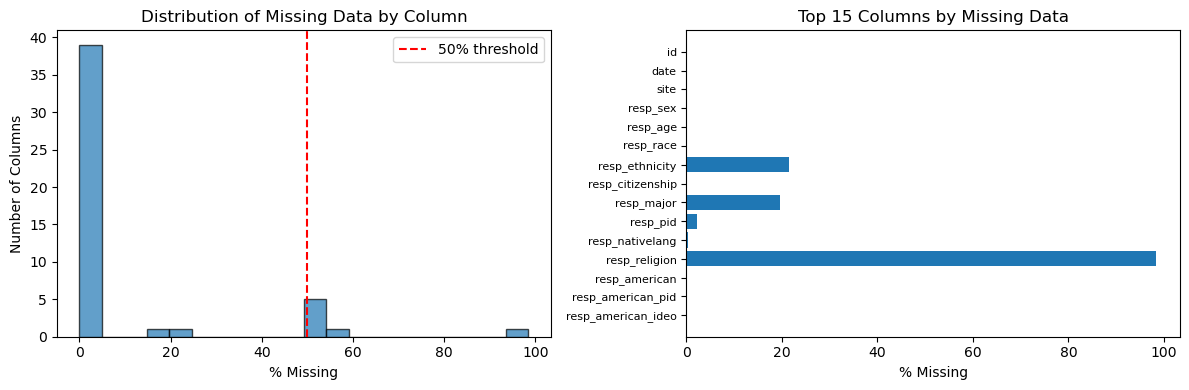

In [27]:
# Missing data visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histogram of missing percentages
axes[0].hist(missing_pct, bins=20, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('% Missing')
axes[0].set_ylabel('Number of Columns')
axes[0].set_title('Distribution of Missing Data by Column')
axes[0].axvline(x=50, color='red', linestyle='--', label='50% threshold')
axes[0].legend()

# Top 15 missing columns
top_missing = missing_pct.head(15)
axes[1].barh(range(len(top_missing)), top_missing.values)
axes[1].set_yticks(range(len(top_missing)))
axes[1].set_yticklabels(top_missing.index, fontsize=8)
axes[1].set_xlabel('% Missing')
axes[1].set_title('Top 15 Columns by Missing Data')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

---
## 4. Study-Level Summary

If data is in long format with study identifiers.

In [28]:
# Check if data has study column (long format)
study_col = None
for col in ['original_study', 'study', 'Study', 'experiment']:
    if col in raw_df.columns:
        study_col = col
        break

if study_col:
    print(f"STUDY-LEVEL SUMMARY (column: {study_col})")
    print("=" * 60)
    study_summary = raw_df.groupby(study_col).agg({
        study_col: 'count'
    }).rename(columns={study_col: 'n_obs'})
    
    # Add more stats if iv/dv columns exist
    if 'iv' in raw_df.columns:
        study_summary['n_treated'] = raw_df.groupby(study_col)['iv'].sum()
        study_summary['treatment_rate'] = (study_summary['n_treated'] / study_summary['n_obs']).round(3)
    
    print(study_summary.sort_values('n_obs', ascending=False))
else:
    print("Data appears to be in wide format (no study column found)")
    print("\nLooking for study-specific columns...")
    
    # Check for study-specific outcome columns
    studies = ['anchor', 'sunk', 'gain', 'flag', 'quote', 'gamb', 'iat', 'recip', 'scale', 'money']
    for study in studies:
        matching = [c for c in raw_df.columns if study in c.lower()]
        if matching:
            print(f"  {study}: {len(matching)} columns - {matching[:3]}...")

STUDY-LEVEL SUMMARY (column: original_study)
                  n_obs  n_treated  treatment_rate
original_study                                    
contact            6336   3172.000           0.501
money              6333   3138.000           0.495
sunk               6330   3243.000           0.512
quote              6325   3242.000           0.513
allowedforbidden   6292   3122.000           0.496
reciprocity        6276   3074.000           0.490
gainloss           6271   3097.000           0.494
flag               6251   3106.000           0.497
gambfal            5942   2680.000           0.451
scales             5899   2820.000           0.478
iat                5842   3982.000           0.682
anchoring3         5627   2764.000           0.491
anchoring4         5609   2933.000           0.523
anchoring1         5362   2762.000           0.515
anchoring2         5284   2698.000           0.511


---
## 5. Site-Level Summary

In [29]:
# Find site column
site_col = None
for col in ['site', 'Site', 'source', 'Source', 'referrer', 'lab']:
    if col in raw_df.columns:
        site_col = col
        break

if site_col:
    print(f"SITE-LEVEL SUMMARY (column: {site_col})")
    print("=" * 60)
    
    site_counts = raw_df[site_col].value_counts()
    print(f"\nNumber of sites: {len(site_counts)}")
    print(f"\nSite distribution:")
    print(site_counts.describe())
    print(f"\nAll sites:")
    print(site_counts)
else:
    print("No site column found in data")

SITE-LEVEL SUMMARY (column: site)

Number of sites: 36

Site distribution:
count      36.000
mean     2499.417
std      3593.348
min      1087.000
25%      1279.250
50%      1460.000
75%      1956.000
max     18948.000
Name: count, dtype: float64

All sites:
site
pi          18948
mturk       14497
lse          3953
tamuon       3214
tamu         2661
jmu          2497
sdsu         2341
swpson       2299
luc          2082
unipd        1914
ufl          1837
oxy          1731
brasilia     1582
laurier      1555
vcu          1550
ku           1511
osu          1510
wku          1465
qccuny       1455
help         1405
wisc         1398
mcdaniel     1392
csun         1375
psu          1363
conncoll     1334
wl           1306
ithaca       1285
wpi          1262
tamuc        1243
abington     1195
charles      1188
uva          1171
qccuny2      1137
msvu         1136
tilburg      1100
swps         1087
Name: count, dtype: int64


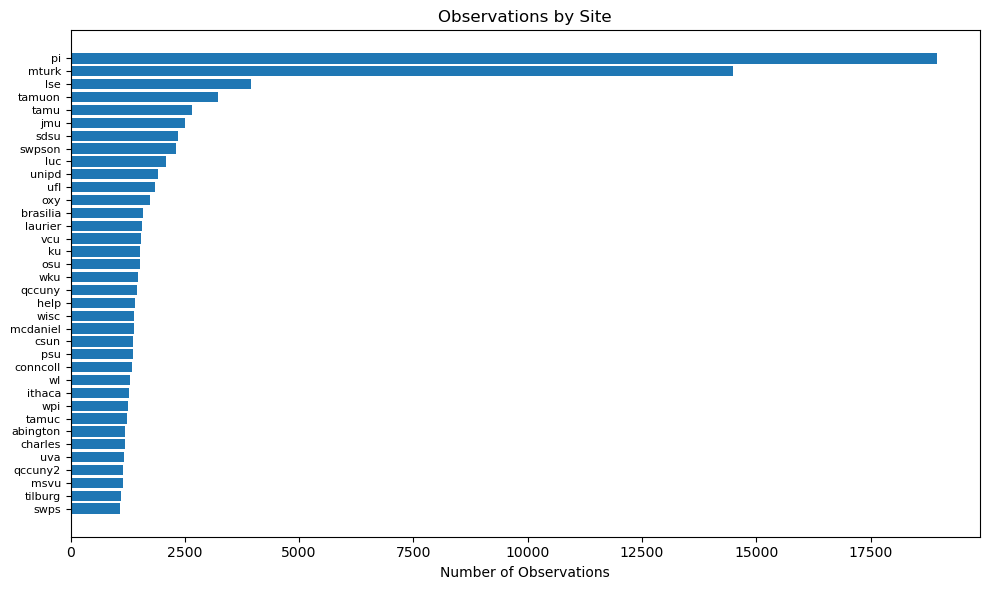

In [30]:
# Site distribution visualization
if site_col and len(raw_df[site_col].unique()) < 50:
    fig, ax = plt.subplots(figsize=(10, 6))
    site_counts = raw_df[site_col].value_counts()
    ax.barh(range(len(site_counts)), site_counts.values)
    ax.set_yticks(range(len(site_counts)))
    ax.set_yticklabels(site_counts.index, fontsize=8)
    ax.set_xlabel('Number of Observations')
    ax.set_title('Observations by Site')
    ax.invert_yaxis()
    plt.tight_layout()
    plt.show()

---
## 6. Covariate Distributions

Key demographics for OSRCT confounding.

In [31]:
# Key covariates for OSRCT
key_covariates = {
    'age': ['resp_age', 'age', 'Age', 'demo_age'],
    'gender': ['resp_gender', 'gender', 'Gender', 'sex', 'Sex', 'demo_gender'],
    'political': ['resp_polideo', 'polideo', 'political', 'ideology']
}

found_covariates = {}
for cov_type, candidates in key_covariates.items():
    for col in candidates:
        if col in raw_df.columns:
            found_covariates[cov_type] = col
            break

print("KEY COVARIATES FOR OSRCT")
print("=" * 60)
for cov_type, col in found_covariates.items():
    print(f"\n{cov_type.upper()} ({col}):")
    print(f"  Valid: {raw_df[col].notna().sum():,} ({raw_df[col].notna().mean()*100:.1f}%)")
    print(f"  Missing: {raw_df[col].isna().sum():,}")
    
    if raw_df[col].dtype in ['float64', 'int64'] and raw_df[col].nunique() > 10:
        print(f"  Range: [{raw_df[col].min():.1f}, {raw_df[col].max():.1f}]")
        print(f"  Mean: {raw_df[col].mean():.2f} (SD: {raw_df[col].std():.2f})")
        print(f"  Median: {raw_df[col].median():.2f}")
    else:
        print(f"  Values: {dict(raw_df[col].value_counts().head(10))}")

KEY COVARIATES FOR OSRCT

AGE (resp_age):
  Valid: 89,979 (100.0%)
  Missing: 0
  Range: [12.0, 100.0]
  Mean: 26.01 (SD: 11.36)
  Median: 21.00

GENDER (resp_gender):
  Valid: 89,979 (100.0%)
  Missing: 0
  Values: {1.0: np.int64(60552), 0.0: np.int64(29315), 0.6479149026248942: np.int64(52), 0.7970813064628214: np.int64(16), 0.7591145833333334: np.int64(14), 0.7236180904522613: np.int64(12), 0.8187820983125459: np.int64(12), 0.7214823393167342: np.int64(4), 0.6590308370044052: np.int64(2)}

POLITICAL (resp_polideo):
  Valid: 89,979 (100.0%)
  Missing: 0
  Range: [0.0, 6.0]
  Mean: 3.45 (SD: 1.57)
  Median: 3.00


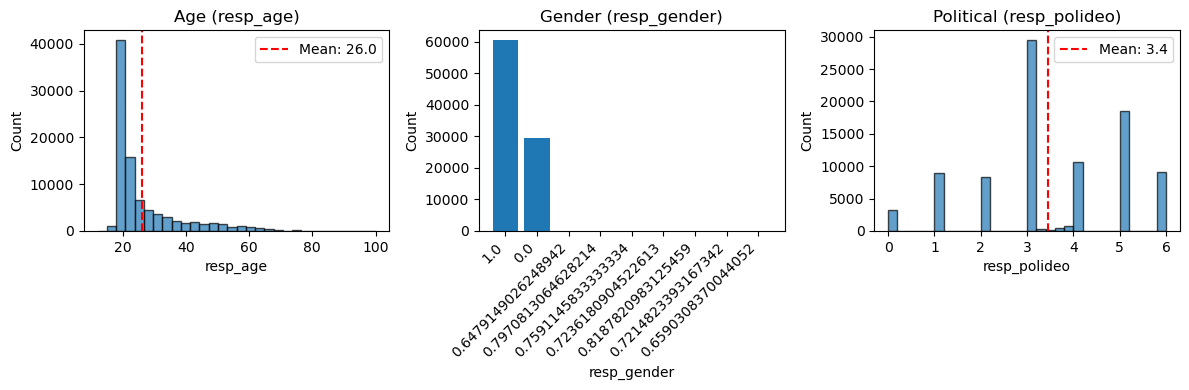

In [32]:
# Covariate distributions
if found_covariates:
    n_covs = len(found_covariates)
    fig, axes = plt.subplots(1, n_covs, figsize=(4*n_covs, 4))
    if n_covs == 1:
        axes = [axes]
    
    for ax, (cov_type, col) in zip(axes, found_covariates.items()):
        data = raw_df[col].dropna()
        
        if data.dtype in ['float64', 'int64'] and data.nunique() > 10:
            ax.hist(data, bins=30, edgecolor='black', alpha=0.7)
            ax.axvline(data.mean(), color='red', linestyle='--', label=f'Mean: {data.mean():.1f}')
            ax.legend()
        else:
            counts = data.value_counts().head(10)
            ax.bar(range(len(counts)), counts.values)
            ax.set_xticks(range(len(counts)))
            ax.set_xticklabels(counts.index, rotation=45, ha='right')
        
        ax.set_title(f'{cov_type.title()} ({col})')
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()

---
## 7. Data Quality Flags

In [33]:
# Data quality assessment
print("DATA QUALITY ASSESSMENT")
print("=" * 60)

quality_flags = []

# Check 1: Overall missing data
overall_missing = raw_df.isnull().sum().sum() / raw_df.size * 100
if overall_missing > 30:
    quality_flags.append(f"HIGH MISSING: {overall_missing:.1f}% of all cells are missing")
elif overall_missing > 10:
    quality_flags.append(f"MODERATE MISSING: {overall_missing:.1f}% of all cells are missing")
print(f"\n1. Overall missing data: {overall_missing:.2f}%")

# Check 2: Duplicate rows
n_duplicates = raw_df.duplicated().sum()
if n_duplicates > 0:
    quality_flags.append(f"DUPLICATES: {n_duplicates} duplicate rows found")
print(f"2. Duplicate rows: {n_duplicates}")

# Check 3: Key covariate availability
for cov_type, col in found_covariates.items():
    valid_pct = raw_df[col].notna().mean() * 100
    if valid_pct < 80:
        quality_flags.append(f"LOW COVERAGE: {cov_type} ({col}) has only {valid_pct:.1f}% valid data")
    print(f"3. {cov_type} coverage: {valid_pct:.1f}%")

# Check 4: Sample size
n_rows = len(raw_df)
if n_rows < 1000:
    quality_flags.append(f"SMALL SAMPLE: Only {n_rows} observations")
print(f"4. Total observations: {n_rows:,}")

# Check 5: Site balance (if applicable)
if site_col:
    site_counts = raw_df[site_col].value_counts()
    min_site = site_counts.min()
    max_site = site_counts.max()
    if min_site < 50:
        quality_flags.append(f"SMALL SITES: Smallest site has only {min_site} observations")
    print(f"5. Site size range: {min_site} - {max_site}")

# Summary
print("\n" + "=" * 60)
print("QUALITY FLAGS")
print("=" * 60)
if quality_flags:
    for flag in quality_flags:
        print(f"  - {flag}")
else:
    print("  No major quality issues detected.")

DATA QUALITY ASSESSMENT

1. Overall missing data: 9.72%
2. Duplicate rows: 0
3. age coverage: 100.0%
3. gender coverage: 100.0%
3. political coverage: 100.0%
4. Total observations: 89,979
5. Site size range: 1087 - 18948

QUALITY FLAGS
  No major quality issues detected.


In [34]:
# Summary statistics export
summary_stats = {
    'data_source': DATA_SOURCE,
    'n_rows': len(raw_df),
    'n_cols': len(raw_df.columns),
    'memory_mb': raw_df.memory_usage(deep=True).sum() / 1e6,
    'pct_missing': overall_missing,
    'n_duplicates': n_duplicates,
    'n_sites': len(raw_df[site_col].unique()) if site_col else None,
    'quality_flags': quality_flags
}

print("\nSUMMARY FOR PIPELINE")
print("=" * 60)
for k, v in summary_stats.items():
    print(f"{k}: {v}")


SUMMARY FOR PIPELINE
data_source: preprocessed
n_rows: 89979
n_cols: 48
memory_mb: 113.673924
pct_missing: 9.720532013025261
n_duplicates: 0
n_sites: 36
quality_flags: []
